In [1]:
import pandas as pd
import numpy as np
from httplib2 import Http
from bs4 import BeautifulSoup, SoupStrainer

class Parser:
    
    def __init__(self, url):  
        http = Http()
        status, response = http.request(url)
        tables = BeautifulSoup(response, "lxml", 
                              parse_only=SoupStrainer("table", {"class":"wikitable sortable"}))
        self.table = tables.contents[1]
    
    def parse_table(self):      
        rows = self.table.find_all("tr")
        header = self.parse_header(rows[0])
        table_array = [self.parse_row(row) for row in rows[1:]]
        table_df = pd.DataFrame(table_array, columns=header).apply(self.clean_table, 1)
        return table_df.replace({"Year":{'':np.nan}})
        
    def parse_row(self, row):     
        columns = row.find_all("td")
        return [BeautifulSoup.get_text(col).strip() for col in columns if BeautifulSoup.get_text(col) != '']
    
    def parse_header(self, row):     
        columns = row.find_all("th")
        return [BeautifulSoup.get_text(col).strip() for col in columns if BeautifulSoup.get_text(col) != ""]
    
    def clean_table(self, row):
        if not row.iloc[0].isdigit() and row.iloc[0] != '':
            return row.shift(1)
        else:
            return row
        
url = "https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Physics"        
parser = Parser(url)   
nobel_df = parser.parse_table()
nobel_df

,Year,Laureate[A],Country[B],Rationale[C]
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ..."
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t..."
2,NaN,Pieter Zeeman,Netherlands,None
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit..."
4,NaN,Pierre Curie,France,"""for their joint researches on the radiation p..."
5,NaN,Maria Skłodowska-Curie,Poland\n France,None
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th..."
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]"
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig..."
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the..."


In [2]:

nobel_df.columns = ['Year','Laureate','Country','Rationale']
nobel_df=nobel_df.dropna(subset=["Country"])
nobel_df=nobel_df.fillna(method='ffill')
nobel_df

,Year,Laureate,Country,Rationale
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ..."
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t..."
2,1902,Pieter Zeeman,Netherlands,"""in recognition of the extraordinary service t..."
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit..."
4,1903,Pierre Curie,France,"""for their joint researches on the radiation p..."
5,1903,Maria Skłodowska-Curie,Poland\n France,"""for their joint researches on the radiation p..."
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th..."
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]"
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig..."
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the..."


In [3]:
nobel_df.isnull().any()

Year         False
Laureate     False
Country      False
Rationale    False
dtype: bool

In [4]:
physicist_number = nobel_df["Laureate"].nunique()
country_number = nobel_df["Country"].nunique()
print(physicist_number)
print(country_number)

203
42


In [5]:
nobel_df["Country_list"] = nobel_df["Country"].str.split('\n')
countries = pd.Series(sum(nobel_df["Country_list"].tolist(), [])).str.strip()
countries

0              Germany
1          Netherlands
2          Netherlands
3               France
4               France
5               Poland
6               France
7       United Kingdom
8      Austria-Hungary
9              Germany
10      United Kingdom
11       United States
12              Poland
13              France
14               Italy
15             Germany
16         Netherlands
17             Germany
18              Sweden
19         Netherlands
20             Germany
21      United Kingdom
22           Australia
23      United Kingdom
24      United Kingdom
25             Germany
26             Germany
27         Switzerland
28             Germany
29         Switzerland
            ...       
207     United Kingdom
208      United States
209             Canada
210      United States
211      United States
212             Russia
213     United Kingdom
214        Netherlands
215             Russia
216     United Kingdom
217      United States
218          Australia
219      Un

In [6]:
countries.value_counts()

United States      94
United Kingdom     27
Germany            18
France             13
Japan              11
Netherlands        10
West Germany        9
Soviet Union        7
Italy               5
Switzerland         5
Russia              5
Sweden              4
Poland              4
Canada              4
China               3
Denmark             3
Austria             3
Australia           2
Hungary             2
India               2
Norway              1
Hong Kong           1
Belgium             1
Ireland             1
Austria-Hungary     1
Pakistan            1
dtype: int64

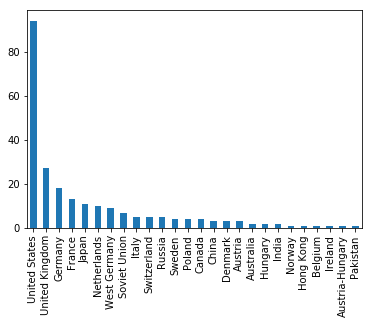

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
countries.value_counts().plot.bar()

In [8]:
from httplib2 import Http
from bs4 import BeautifulSoup, SoupStrainer

http = Http()
status, response = http.request(url)

table = BeautifulSoup(response, "lxml", parse_only=SoupStrainer('table'))
link_df = pd.DataFrame([[x.string, x["href"]] for x in table.contents[1].find_all("a")],
                       columns=["text", "link"]).drop_duplicates()

link_df

,text,link
0,[A],#endnote_1
1,[B],#endnote_2
2,[C],#endnote_3
3,None,/wiki/File:WilhelmR%C3%B6ntgen.JPG
4,Wilhelm Conrad Röntgen,/wiki/Wilhelm_R%C3%B6ntgen
5,Germany,/wiki/German_Empire
6,rays,/wiki/R%C3%B6ntgen_ray
7,[7],#cite_note-7
8,None,/wiki/File:H_A_Lorentz_(Nobel).jpg
9,Hendrik Lorentz,/wiki/Hendrik_Lorentz


In [9]:
link_df.columns =['Laureate','link']
link_df

nobel_merged_df = pd.merge(nobel_df, link_df, how='inner', indicator=True)
#nobel_merged_df =  pd.concat([link_df,nobel_df])
#nobel_merged_df  
nobel_merged_df

,Year,Laureate,Country,Rationale,Country_list,link,_merge
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ...",[Germany],/wiki/Wilhelm_R%C3%B6ntgen,both
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Hendrik_Lorentz,both
2,1902,Pieter Zeeman,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Pieter_Zeeman,both
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit...",[France],/wiki/Henri_Becquerel,both
4,1903,Pierre Curie,France,"""for their joint researches on the radiation p...",[France],/wiki/Pierre_Curie,both
5,1903,Maria Skłodowska-Curie,Poland\n France,"""for their joint researches on the radiation p...","[Poland, France]",/wiki/Maria_Sk%C5%82odowska-Curie,both
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th...",[United Kingdom],"/wiki/John_Strutt,_3rd_Baron_Rayleigh",both
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]","[Austria-Hungary, Germany]",/wiki/Philipp_Lenard,both
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig...",[United Kingdom],/wiki/J._J._Thomson,both
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the...","[United States, Poland]",/wiki/Albert_Abraham_Michelson,both


In [10]:
def get_text(link, root_website = "https://en.wikipedia.org"):    
    http = Http()
    status, response = http.request(root_website + link)

    body = BeautifulSoup(response, "lxml", parse_only=SoupStrainer("div", {"id":"mw-content-text"}))
    return BeautifulSoup.get_text(body.contents[1])

nobel_merged_df.set_index("Laureate", inplace=True)

# TODO: extract the text of the wikipedia page associated to each physicist
nobel_merged_df["Bio"] = nobel_merged_df['link'].apply(get_text)
#nobel_merged_df["Bio"] = nobel_merged_df.apply(lambda x: get_text, 1)
nobel_merged_df["Bio"]

Laureate
Wilhelm Conrad Röntgen             \n\nWilhelm Röntgen\n\n\n\n\n\nBorn\nWilhelm C...
Hendrik Lorentz                    Not to be confused with Hendrikus Albertus Lor...
Pieter Zeeman                      \n\nPieter Zeeman\n\n\n\n\n\nBorn\n(1865-05-25...
Antoine Henri Becquerel            For other uses, see Becquerel (disambiguation)...
Pierre Curie                       \n\nPierre Curie\n\n\n\n\n\nBorn\n(1859-05-15)...
Maria Skłodowska-Curie             This article is about the Polish physicist. Fo...
Lord Rayleigh                      \n\nThe Lord Rayleigh\nOM PRS\n\n\n\n\n\nBorn\...
Philipp Eduard Anton von Lenard    "Waterfall effect" redirects here. For the ill...
Joseph John Thomson                This article is about the Nobel laureate and p...
Albert Abraham Michelson           Not to be confused with the athlete Albert Mic...
Gabriel Lippmann                   \n\nGabriel Lippmann\n\n\n\n\n\nBorn\nJonas Fe...
Guglielmo Marconi                  "Marconi" redirects h

In [11]:
from string import punctuation
print(punctuation)
# for p in punctuation + "1234567890":
#     nobel_merged_df["Bio"][2] = nobel_merged_df["Bio"][2].replace(p,'').lower()  
    
# nobel_merged_df["Bio"][2]

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [12]:
# TODO: write a function that remove the punctuation and numbers and set every word to lower case
def clean_string(string):
    for p in punctuation + "1234567890":
            string = string.replace(p,'').lower()
    return string
    #pass

# TODO: apply this function to the "Bio" column
nobel_merged_df["Bio"] =  nobel_merged_df["Bio"].apply(clean_string)
nobel_merged_df["Bio"]

Laureate
Wilhelm Conrad Röntgen             \n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...
Hendrik Lorentz                    not to be confused with hendrikus albertus lor...
Pieter Zeeman                      \n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...
Antoine Henri Becquerel            for other uses see becquerel disambiguation\n\...
Pierre Curie                       \n\npierre curie\n\n\n\n\n\nborn\n may \nparis...
Maria Skłodowska-Curie             this article is about the polish physicist for...
Lord Rayleigh                      \n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...
Philipp Eduard Anton von Lenard    waterfall effect redirects here for the illuso...
Joseph John Thomson                this article is about the nobel laureate and p...
Albert Abraham Michelson           not to be confused with the athlete albert mic...
Gabriel Lippmann                   \n\ngabriel lippmann\n\n\n\n\n\nborn\njonas fe...
Guglielmo Marconi                  marconi redirects her

In [13]:
# TODO: split the "Bio" column as a column of lists of the words 
#nobel_df["Country_list"] = nobel_df["Country"].str.split('\s')
nobel_merged_df["Bio_list"] = nobel_merged_df["Bio"].str.split()
nobel_merged_df["Bio_list"]

Laureate
Wilhelm Conrad Röntgen             [wilhelm, röntgen, born, wilhelm, conrad, rönt...
Hendrik Lorentz                    [not, to, be, confused, with, hendrikus, alber...
Pieter Zeeman                      [pieter, zeeman, born, may, zonnemaire, nether...
Antoine Henri Becquerel            [for, other, uses, see, becquerel, disambiguat...
Pierre Curie                       [pierre, curie, born, may, paris, france, died...
Maria Skłodowska-Curie             [this, article, is, about, the, polish, physic...
Lord Rayleigh                      [the, lord, rayleigh, om, prs, born, november,...
Philipp Eduard Anton von Lenard    [waterfall, effect, redirects, here, for, the,...
Joseph John Thomson                [this, article, is, about, the, nobel, laureat...
Albert Abraham Michelson           [not, to, be, confused, with, the, athlete, al...
Gabriel Lippmann                   [gabriel, lippmann, born, jonas, ferdinand, ga...
Guglielmo Marconi                  [marconi, redirects, 

In [14]:
import nltk
from nltk.corpus import stopwords



# TODO: Write a function that removes `None` elements from a list
def remove(list_to_clean, element_to_remove=[None, ""]):
    list_cleaned = [x for x in list_to_clean if x not in element_to_remove]
    return list_cleaned

words_to_remove = set(stopwords.words('english'))

# TODO: remove the stop words
nobel_merged_df["Bio_list"] =  nobel_merged_df["Bio_list"].apply(remove, element_to_remove = words_to_remove)
nobel_merged_df["Bio_list"]

Laureate
Wilhelm Conrad Röntgen             [wilhelm, röntgen, born, wilhelm, conrad, rönt...
Hendrik Lorentz                    [confused, hendrikus, albertus, lorentz, ludvi...
Pieter Zeeman                      [pieter, zeeman, born, may, zonnemaire, nether...
Antoine Henri Becquerel            [uses, see, becquerel, disambiguation, antoine...
Pierre Curie                       [pierre, curie, born, may, paris, france, died...
Maria Skłodowska-Curie             [article, polish, physicist, uses, see, marie,...
Lord Rayleigh                      [lord, rayleigh, om, prs, born, november, lang...
Philipp Eduard Anton von Lenard    [waterfall, effect, redirects, illusory, visua...
Joseph John Thomson                [article, nobel, laureate, physicist, moral, p...
Albert Abraham Michelson           [confused, athlete, albert, michelsen, albert,...
Gabriel Lippmann                   [gabriel, lippmann, born, jonas, ferdinand, ga...
Guglielmo Marconi                  [marconi, redirects, 

In [15]:

def remove_one(list_to_clean):
    keep_element = [x for x in list_to_clean if len(x)>1]
    
    return keep_element



# # TODO: apply this function to the "bio_list" column
nobel_merged_df["Bio_list"] = [remove_one(x) for x in list(nobel_merged_df.Bio_list)]
nobel_merged_df["Bio_list"]

Laureate
Wilhelm Conrad Röntgen             [wilhelm, röntgen, born, wilhelm, conrad, rönt...
Hendrik Lorentz                    [confused, hendrikus, albertus, lorentz, ludvi...
Pieter Zeeman                      [pieter, zeeman, born, may, zonnemaire, nether...
Antoine Henri Becquerel            [uses, see, becquerel, disambiguation, antoine...
Pierre Curie                       [pierre, curie, born, may, paris, france, died...
Maria Skłodowska-Curie             [article, polish, physicist, uses, see, marie,...
Lord Rayleigh                      [lord, rayleigh, om, prs, born, november, lang...
Philipp Eduard Anton von Lenard    [waterfall, effect, redirects, illusory, visua...
Joseph John Thomson                [article, nobel, laureate, physicist, moral, p...
Albert Abraham Michelson           [confused, athlete, albert, michelsen, albert,...
Gabriel Lippmann                   [gabriel, lippmann, born, jonas, ferdinand, ga...
Guglielmo Marconi                  [marconi, redirects, 

In [16]:
from collections import Counter
# # TODO: write a function that remove all the words under a certain amount of occurance
def remove_n_occurrance(list_to_clean, n = 5):
    F=Counter(list_to_clean)
    words_to_keep= [i for i in list(F.keys()) if F[i]<= n]
    return words_to_keep
     
 
# # TODO: apply this function to the "bio_list" column
nobel_merged_df["Bio_list"] = [remove_n_occurrance(x,n=5) for x in list(nobel_merged_df.Bio_list)]
nobel_merged_df["Bio_list"]


Laureate
Wilhelm Conrad Röntgen             [born, march, lennep, rhine, province, confede...
Hendrik Lorentz                    [confused, hendrikus, albertus, ludvig, lorenz...
Pieter Zeeman                      [born, may, zonnemaire, died, october, aged, n...
Antoine Henri Becquerel            [uses, see, disambiguation, antoine, french, p...
Pierre Curie                       [born, may, france, died, aged, nationality, f...
Maria Skłodowska-Curie             [article, uses, see, disambiguation, slavic, s...
Lord Rayleigh                      [om, prs, born, november, langford, grove, mal...
Philipp Eduard Anton von Lenard    [waterfall, redirects, illusory, visual, motio...
Joseph John Thomson                [article, laureate, physicist, moral, philosop...
Albert Abraham Michelson           [confused, athlete, michelsen, born, december,...
Gabriel Lippmann                   [born, jonas, ferdinand, august, bonnevoieboun...
Guglielmo Marconi                  [redirects, uses, dis

In [17]:
# # TODO: write a function that keeps only each element of a list only once
def remove_duplicates(list_to_clean):
    new_list=list(set(list_to_clean))
    return (new_list)

# # TODO: apply this function to the "bio_list" column
nobel_merged_df["Bio_list"] =  [remove_duplicates(x) for x in nobel_merged_df.Bio_list]
nobel_merged_df["Bio_list"]

Laureate
Wilhelm Conrad Röntgen             [munich, fluorescent, wikisource, learn, links...
Hendrik Lorentz                    [teaching, suess, grote, universal, johannes, ...
Pieter Zeeman                      [gravitational, weight, links, rendus, ting, g...
Antoine Henri Becquerel            [seems, often, links, glauber, ting, harold, n...
Pierre Curie                       [gravitational, links, rendus, ting, glauber, ...
Maria Skłodowska-Curie             [teaching, isolated, rendus, exchange, divisio...
Lord Rayleigh                      [wikisource, peerage, links, glauber, arthur, ...
Philipp Eduard Anton von Lenard    [water, glossary, learn, citizenship, links, k...
Joseph John Thomson                [gravitational, suess, zeleny, universal, joha...
Albert Abraham Michelson           [merchant, suess, zeleny, exhibits, collège, h...
Gabriel Lippmann                   [teaching, water, wikisource, illdefined, ofte...
Guglielmo Marconi                  [merchant, incorporat

In [18]:
physics_df = pd.DataFrame({"Field": ["Nuclear physics",
                                     "Particle physics", 
                                     "Atomic, molecular, and optical physics", 
                                     "Condensed matter physics", 
                                     "Astrophysics",
                                     "Physical_cosmology"],
                           "link": ["/wiki/Nuclear_physics",
                                     "/wiki/Particle_physics", 
                                     "/wiki/Atomic,_molecular,_and_optical_physics", 
                                     "/wiki/Condensed_matter_physics", 
                                     "/wiki/Astrophysics",
                                     "/wiki/Physical_cosmology"]})

physics_df.set_index("Field", inplace=True)

# TODO: gather and clean the data related to those physics fields wikipedia pages
physics_df["Text_data"] =physics_df['link'].apply(get_text)
physics_df["Text_data"]=physics_df['Text_data'].apply(clean_string)
physics_df["Text_data"]=physics_df["Text_data"].str.split()
physics_df["Text_data"]=physics_df['Text_data'].apply(remove, element_to_remove = words_to_remove)
physics_df["Text_data"]=physics_df['Text_data'].apply(remove_one)
physics_df["Text_data"]=physics_df['Text_data'].apply(remove_n_occurrance)
# physics_df["Text_data"]=[remove_duplicates(x) for x in physics_df.Text_data]
physics_df["Text_data"]=physics_df['Text_data'].apply(remove_duplicates)



physics_df["Text_data"]


Field
Nuclear physics                           [gravitational, collided, expanded, suess, com...
Particle physics                          [elaboration, collided, gravitational, bes, of...
Atomic, molecular, and optical physics    [glossary, often, isolated, glauber, links, co...
Condensed matter physics                  [water, expanded, kyun, often, electronics, co...
Astrophysics                              [gravitational, uniform, expanded, composition...
Physical_cosmology                        [glossary, energies, allows, division, univers...
Name: Text_data, dtype: object

In [19]:

# TODO: Write a function that count the number of words that intersect between two lists
def intersect_count(list1, list2):
    return len(set(list1).intersection(list2)) 

# TODO: create those columns
nobel_merged_df["Count_intersect_Nuclear"] =[intersect_count(list1=x,list2=physics_df.loc["Nuclear physics"]["Text_data"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_intersect_Particle"] = [intersect_count(list1=x,list2=physics_df.loc["Particle physics"]["Text_data"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_intersect_Atomic"] = [intersect_count(list1=x,list2=physics_df.loc["Atomic, molecular, and optical physics"]["Text_data"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_intersect_Condensed"] =[intersect_count(list1=x,list2=physics_df.loc["Condensed matter physics"]["Text_data"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_intersect_Astrophysics"] =[intersect_count(list1=x,list2=physics_df.loc["Astrophysics"]["Text_data"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_intersect_Cosmology"] =[intersect_count(list1=x,list2=physics_df.loc["Physical_cosmology"]["Text_data"]) for x in nobel_merged_df["Bio_list"]]

nobel_merged_df

,Year,Country,Rationale,Country_list,link,_merge,Bio,Bio_list,Count_intersect_Nuclear,Count_intersect_Particle,Count_intersect_Atomic,Count_intersect_Condensed,Count_intersect_Astrophysics,Count_intersect_Cosmology
Laureate,,,,,,,,,,,,,,
Wilhelm Conrad Röntgen,1901,Germany,"""in recognition of the extraordinary services ...",[Germany],/wiki/Wilhelm_R%C3%B6ntgen,both,\n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...,"[munich, fluorescent, wikisource, learn, links...",178,215,131,183,161,169
Hendrik Lorentz,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Hendrik_Lorentz,both,not to be confused with hendrikus albertus lor...,"[teaching, suess, grote, universal, johannes, ...",263,277,201,287,252,308
Pieter Zeeman,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Pieter_Zeeman,both,\n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...,"[gravitational, weight, links, rendus, ting, g...",138,164,104,153,138,121
Antoine Henri Becquerel,1903,France,"""for his discovery of spontaneous radioactivit...",[France],/wiki/Henri_Becquerel,both,for other uses see becquerel disambiguation\n\...,"[seems, often, links, glauber, ting, harold, n...",164,190,123,166,142,157
Pierre Curie,1903,France,"""for their joint researches on the radiation p...",[France],/wiki/Pierre_Curie,both,\n\npierre curie\n\n\n\n\n\nborn\n may \nparis...,"[gravitational, links, rendus, ting, glauber, ...",174,198,140,203,169,178
Maria Skłodowska-Curie,1903,Poland\n France,"""for their joint researches on the radiation p...","[Poland, France]",/wiki/Maria_Sk%C5%82odowska-Curie,both,this article is about the polish physicist for...,"[teaching, isolated, rendus, exchange, divisio...",301,321,215,317,267,319
Lord Rayleigh,1904,United Kingdom,"""for his investigations of the densities of th...",[United Kingdom],"/wiki/John_Strutt,_3rd_Baron_Rayleigh",both,\n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...,"[wikisource, peerage, links, glauber, arthur, ...",154,194,134,182,167,156
Philipp Eduard Anton von Lenard,1905,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]","[Austria-Hungary, Germany]",/wiki/Philipp_Lenard,both,waterfall effect redirects here for the illuso...,"[water, glossary, learn, citizenship, links, k...",186,204,147,191,171,183
Joseph John Thomson,1906,United Kingdom,"""for his theoretical and experimental investig...",[United Kingdom],/wiki/J._J._Thomson,both,this article is about the nobel laureate and p...,"[gravitational, suess, zeleny, universal, joha...",250,265,193,264,248,274


In [20]:
# TODO: Write a function that count the total number of unique words contained in two lists
def total_count(list1, list2):
    return len(np.unique([list1, list2]))

# def total_count(list1, list2):
#     return np.unique([list1, list2]).shape[0]

# TODO: create those columns
nobel_merged_df["Count_total_Nuclear"] = [total_count(list1=x,list2=physics_df.loc["Nuclear physics", "Text_data"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_total_Particle"] = [total_count(list1=x,list2=physics_df.loc["Particle physics", "Text_data"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_total_Atomic"] =  [total_count(list1=x,list2=physics_df.loc["Atomic, molecular, and optical physics", "Text_data"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_total_Condensed"] = [total_count(list1=x,list2=physics_df.loc["Nuclear physics", "Text_data"]) for x in nobel_merged_df["Bio_list"]] 
nobel_merged_df["Count_total_Astrophysics"] = [total_count(list1=x,list2=physics_df.loc["Astrophysics", "Text_data"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Count_total_Cosmology"] = [total_count(list1=x,list2=physics_df.loc["Physical_cosmology", "Text_data"]) for x in nobel_merged_df["Bio_list"]]

nobel_merged_df

#Shaina: count total should be higher than count intersect; -0.5

,Year,Country,Rationale,Country_list,link,_merge,Bio,Bio_list,Count_intersect_Nuclear,Count_intersect_Particle,Count_intersect_Atomic,Count_intersect_Condensed,Count_intersect_Astrophysics,Count_intersect_Cosmology,Count_total_Nuclear,Count_total_Particle,Count_total_Atomic,Count_total_Condensed,Count_total_Astrophysics,Count_total_Cosmology
Laureate,,,,,,,,,,,,,,,,,,,,
Wilhelm Conrad Röntgen,1901,Germany,"""in recognition of the extraordinary services ...",[Germany],/wiki/Wilhelm_R%C3%B6ntgen,both,\n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...,"[munich, fluorescent, wikisource, learn, links...",178,215,131,183,161,169,2,2,2,2,2,2
Hendrik Lorentz,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Hendrik_Lorentz,both,not to be confused with hendrikus albertus lor...,"[teaching, suess, grote, universal, johannes, ...",263,277,201,287,252,308,2,2,2,2,2,2
Pieter Zeeman,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Pieter_Zeeman,both,\n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...,"[gravitational, weight, links, rendus, ting, g...",138,164,104,153,138,121,2,2,2,2,2,2
Antoine Henri Becquerel,1903,France,"""for his discovery of spontaneous radioactivit...",[France],/wiki/Henri_Becquerel,both,for other uses see becquerel disambiguation\n\...,"[seems, often, links, glauber, ting, harold, n...",164,190,123,166,142,157,2,2,2,2,2,2
Pierre Curie,1903,France,"""for their joint researches on the radiation p...",[France],/wiki/Pierre_Curie,both,\n\npierre curie\n\n\n\n\n\nborn\n may \nparis...,"[gravitational, links, rendus, ting, glauber, ...",174,198,140,203,169,178,2,2,2,2,2,2
Maria Skłodowska-Curie,1903,Poland\n France,"""for their joint researches on the radiation p...","[Poland, France]",/wiki/Maria_Sk%C5%82odowska-Curie,both,this article is about the polish physicist for...,"[teaching, isolated, rendus, exchange, divisio...",301,321,215,317,267,319,2,2,2,2,2,2
Lord Rayleigh,1904,United Kingdom,"""for his investigations of the densities of th...",[United Kingdom],"/wiki/John_Strutt,_3rd_Baron_Rayleigh",both,\n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...,"[wikisource, peerage, links, glauber, arthur, ...",154,194,134,182,167,156,2,2,2,2,2,2
Philipp Eduard Anton von Lenard,1905,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]","[Austria-Hungary, Germany]",/wiki/Philipp_Lenard,both,waterfall effect redirects here for the illuso...,"[water, glossary, learn, citizenship, links, k...",186,204,147,191,171,183,2,2,2,2,2,2
Joseph John Thomson,1906,United Kingdom,"""for his theoretical and experimental investig...",[United Kingdom],/wiki/J._J._Thomson,both,this article is about the nobel laureate and p...,"[gravitational, suess, zeleny, universal, joha...",250,265,193,264,248,274,2,2,2,2,2,2


In [21]:
# import numpy as np
# from sklearn.metrics import jaccard_similarity_score

# def jaccard(list1,list2):
#     return jaccard_similarity_score(list1,list2,normalize=True)
#intersection over union

# TODO: Compute those columns
# nobel_merged_df["Proba_Nuclear"] = nobel_merged_df["Count_intersect_Nuclear"]/nobel_merged_df["Count_total_Nuclear"]
# nobel_merged_df["Proba_Particle"] = [total_count(list1=x,list2=physics_df.loc["Particle physics", "Text_data"]) for x in nobel_merged_df["Bio_list"]]
# nobel_merged_df["Proba_Atomic"] =  [total_count(list1=x,list2=physics_df.loc["Atomic, molecular, and optical physics", "Text_data"]) for x in nobel_merged_df["Bio_list"]]
# nobel_merged_df["Proba_Condensed"] = [total_count(list1=x,list2=physics_df.loc["Nuclear physics", "Text_data"]) for x in nobel_merged_df["Bio_list"]] 
# nobel_merged_df["Proba_Astrophysics"] = [total_count(list1=x,list2=physics_df.loc["Astrophysics", "Text_data"]) for x in nobel_merged_df["Bio_list"]]
# nobel_merged_df["Proba_Cosmology"] = [total_count(list1=x,list2=physics_df.loc["Physical_cosmology", "Text_data"]) for x in nobel_merged_df["Bio_list"]]
nobel_merged_df["Proba_Nuclear"] = nobel_merged_df["Count_intersect_Nuclear"]/nobel_merged_df["Count_total_Nuclear"]
nobel_merged_df["Proba_Particle"] = nobel_merged_df["Count_intersect_Particle"]/nobel_merged_df["Count_total_Particle"]
nobel_merged_df["Proba_Atomic"] = nobel_merged_df["Count_intersect_Atomic"]/nobel_merged_df["Count_total_Atomic"]
nobel_merged_df["Proba_Condensed"] = nobel_merged_df["Count_intersect_Condensed"]/nobel_merged_df["Count_total_Nuclear"]
nobel_merged_df["Proba_Astrophysics"] = nobel_merged_df["Count_intersect_Astrophysics"]/nobel_merged_df["Count_total_Astrophysics"]
nobel_merged_df["Proba_Cosmology"] = nobel_merged_df["Count_intersect_Cosmology"]/nobel_merged_df["Count_total_Cosmology"]


nobel_merged_df

#Shaina: probabilities should not be so high; -0.5

,Year,Country,Rationale,Country_list,link,_merge,Bio,Bio_list,Count_intersect_Nuclear,Count_intersect_Particle,...,Count_total_Atomic,Count_total_Condensed,Count_total_Astrophysics,Count_total_Cosmology,Proba_Nuclear,Proba_Particle,Proba_Atomic,Proba_Condensed,Proba_Astrophysics,Proba_Cosmology
Laureate,,,,,,,,,,,,,,,,,,,,,
Wilhelm Conrad Röntgen,1901,Germany,"""in recognition of the extraordinary services ...",[Germany],/wiki/Wilhelm_R%C3%B6ntgen,both,\n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...,"[munich, fluorescent, wikisource, learn, links...",178,215,...,2,2,2,2,89.0,107.5,65.5,91.5,80.5,84.5
Hendrik Lorentz,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Hendrik_Lorentz,both,not to be confused with hendrikus albertus lor...,"[teaching, suess, grote, universal, johannes, ...",263,277,...,2,2,2,2,131.5,138.5,100.5,143.5,126.0,154.0
Pieter Zeeman,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],/wiki/Pieter_Zeeman,both,\n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...,"[gravitational, weight, links, rendus, ting, g...",138,164,...,2,2,2,2,69.0,82.0,52.0,76.5,69.0,60.5
Antoine Henri Becquerel,1903,France,"""for his discovery of spontaneous radioactivit...",[France],/wiki/Henri_Becquerel,both,for other uses see becquerel disambiguation\n\...,"[seems, often, links, glauber, ting, harold, n...",164,190,...,2,2,2,2,82.0,95.0,61.5,83.0,71.0,78.5
Pierre Curie,1903,France,"""for their joint researches on the radiation p...",[France],/wiki/Pierre_Curie,both,\n\npierre curie\n\n\n\n\n\nborn\n may \nparis...,"[gravitational, links, rendus, ting, glauber, ...",174,198,...,2,2,2,2,87.0,99.0,70.0,101.5,84.5,89.0
Maria Skłodowska-Curie,1903,Poland\n France,"""for their joint researches on the radiation p...","[Poland, France]",/wiki/Maria_Sk%C5%82odowska-Curie,both,this article is about the polish physicist for...,"[teaching, isolated, rendus, exchange, divisio...",301,321,...,2,2,2,2,150.5,160.5,107.5,158.5,133.5,159.5
Lord Rayleigh,1904,United Kingdom,"""for his investigations of the densities of th...",[United Kingdom],"/wiki/John_Strutt,_3rd_Baron_Rayleigh",both,\n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...,"[wikisource, peerage, links, glauber, arthur, ...",154,194,...,2,2,2,2,77.0,97.0,67.0,91.0,83.5,78.0
Philipp Eduard Anton von Lenard,1905,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]","[Austria-Hungary, Germany]",/wiki/Philipp_Lenard,both,waterfall effect redirects here for the illuso...,"[water, glossary, learn, citizenship, links, k...",186,204,...,2,2,2,2,93.0,102.0,73.5,95.5,85.5,91.5
Joseph John Thomson,1906,United Kingdom,"""for his theoretical and experimental investig...",[United Kingdom],/wiki/J._J._Thomson,both,this article is about the nobel laureate and p...,"[gravitational, suess, zeleny, universal, joha...",250,265,...,2,2,2,2,125.0,132.5,96.5,132.0,124.0,137.0


In [22]:
#Use pd.idxmax to capture what field has the highest probability of intersection.

proba_cols = ["Proba_Nuclear",
              "Proba_Particle",
              "Proba_Atomic",
              "Proba_Condensed",
              "Proba_Astrophysics",
              "Proba_Cosmology"]

# We normalize the probability to 1
nobel_merged_df[proba_cols] = nobel_merged_df[proba_cols].apply(lambda x: x / sum(x), 1)
nobel_merged_df[proba_cols].idxmax()
# print(nobel_merged_df[proba_cols].idxmax())
# TODO: Which field each physicist belongs to?

#Shaina: rest of the physicists? -0.5

Proba_Nuclear            James Chadwick
Proba_Particle        Riccardo Giacconi
Proba_Atomic          Toshihide Maskawa
Proba_Condensed       David J. Wineland
Proba_Astrophysics       John C. Mather
Proba_Cosmology         Albert Einstein
dtype: object